# 2019 Bay Wheels (Ex FordBike) Ride users patterns and findings
### by Hassan Ayman

## Investigation Overview

In this investigation, I wanted to look at the duration and amount of trips , and their association with other impactful features : user type , day of week, hour of day , month. To study the patterns of users using the bikking sharing system

## Dataset Overview

After combining all months files of 2019 ,removing nulls,removing the neglected feature, adding required columns , the resulted dataset contains 2,506,983 trips with 18 feature columns. no duplications found, cleaned combined data are saved into csv format

I have moved on with remvoing nulls although it eleminated December records totally , as when i left it, it affected danalysis badly

The dataset focusing on 2019 trips in bay arena , SanFrancisco,US.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

# hide any warnings from output
import warnings
warnings.simplefilter("ignore")

In [5]:

#import dataset
df_cln = pd.read_csv(r'fordbike_2019_clean.csv')

#trasnform the needed columns to reformat in the right type

#let's tranform ids columns into the right form (str)
df_cln['start_station_id'] = df_cln['start_station_id'].astype('str')
df_cln['end_station_id'] = df_cln['end_station_id'].astype('str')
df_cln['bike_id'] = df_cln['bike_id'].astype('str')

#let's transofrm categorical columns from object to catgeroy type
df_cln['user_type'] = df_cln['user_type'].astype('category')
df_cln['bike_share_for_all_trip']= df_cln['bike_share_for_all_trip'].astype('category')

#let's modify the start/end time columns to be in timestamp format
df_cln['start_time'] = pd.to_datetime(df_cln['start_time'])
df_cln['end_time'] = pd.to_datetime(df_cln['end_time'])

#transofrm days in days of week column into ordered categories for ease of charting
weekday = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekdayord = pd.api.types.CategoricalDtype(ordered=True, categories=weekday)
df_cln['start_dayofweek'] = df_cln['start_dayofweek'].astype(weekdayord)

#transofrm months in month column into ordered categories for ease of charting
month = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November']
monthord = pd.api.types.CategoricalDtype(ordered=True, categories=month)
df_cln['start_month'] = df_cln['start_month'].astype(monthord)

#let's check how does the datset looks like now
df_cln.info(null_counts=True)


&lt;class &#39;pandas.core.frame.DataFrame&#39;&gt;
RangeIndex: 2240401 entries, 0 to 2240400
Data columns (total 18 columns):
 #   Column                   Non-Null Count    Dtype         
---  ------                   --------------    -----         
 0   duration_sec             2240401 non-null  int64         
 1   start_time               2240401 non-null  datetime64[ns]
 2   end_time                 2240401 non-null  datetime64[ns]
 3   start_station_id         2240401 non-null  object        
 4   start_station_name       2240401 non-null  object        
 5   start_station_latitude   2240401 non-null  float64       
 6   start_station_longitude  2240401 non-null  float64       
 7   end_station_id           2240401 non-null  object        
 8   end_station_name         2240401 non-null  object        
 9   end_station_latitude     2240401 non-null  float64       
 10  end_station_longitude    2240401 non-null  float64       
 11  bike_id                  2240401 non-null  object

## User Types with Weekdays and monthly trips

> -	Weekly basis, Trips are going down significantly at Saturdays and Sundays, which is reasonable to have lower number of trips at weekends.
-	Monthly, Trips are focused at spring and autumn, mainly top 3 months: March, April, September. Not a surprise to have most trips at best weather seasons! (P.S: December was removed totally while removing nulls, couldn't leave it as it causes misleading results as mentioned before)


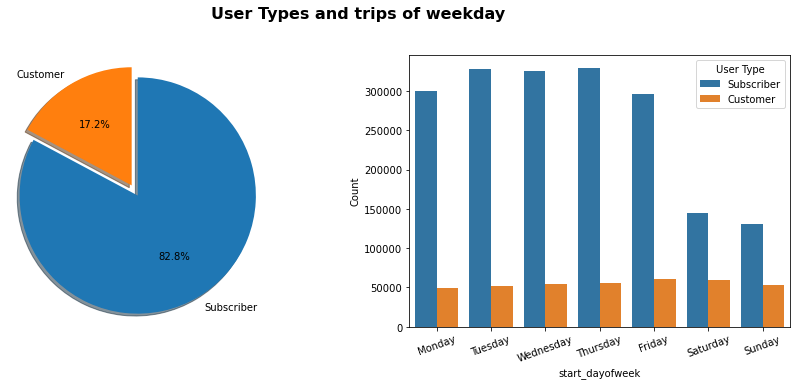

In [17]:
#let's plot 

plt.figure(figsize=[15, 5]);
base_color = sb.color_palette()[0];


plt.subplot(1, 2, 1);
sorted_vals = df_cln.user_type.value_counts()/df_cln.shape[0];
plt.pie(sorted_vals, explode=[0, 0.1], labels=sorted_vals.index, startangle=90, counterclock=False, autopct='%1.1f%%', shadow=True);
plt.axis('square');

plt.subplot(1, 2, 2);
ax = sb.countplot(data=df_cln, x='start_dayofweek', hue='user_type', hue_order=sorted_vals.index);
ax.legend(title='User Type');
plt.xticks(rotation=20);
plt.ylabel('Count');
plt.suptitle('User Types and trips of weekday', fontsize=16, fontweight='semibold', y=1.015);



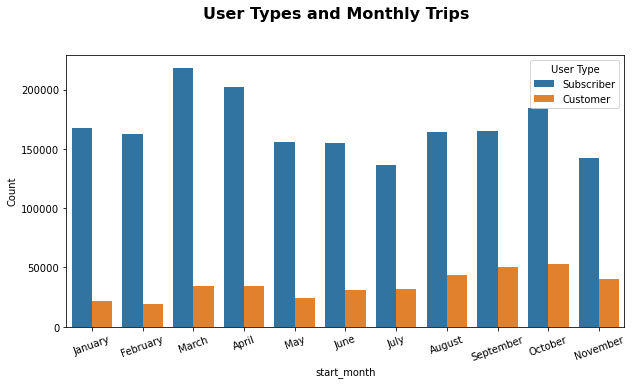

In [19]:

plt.figure(figsize=[10, 5]);
ax = sb.countplot(data=df_cln, x='start_month', hue='user_type', hue_order=sorted_vals.index);
ax.legend(title='User Type');
plt.xticks(rotation=20);
plt.ylabel('Count');
plt.suptitle('User Types and Monthly Trips', fontsize=16, fontweight='semibold', y=1.015);

## Average Weekday Trip Duration each user type

> - Generally ,Subscribers ride much shorter/quicker trips compared to customers on each day of the week.  
- customers have higher avrege durations , especially at weekends , This may indicates that most of customers are tourists who are biking for fun

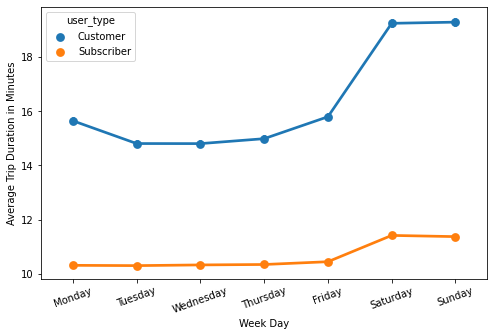

In [20]:
#let's check the the duration for every user type per weekday 

plt.figure(figsize=[8, 5]);
sb.pointplot(data=df_cln, x='start_dayofweek', y='duration_minute', hue='user_type');
plt.xlabel('Week Day');
plt.ylabel('Average Trip Duration in Minutes');
plt.xticks(rotation=20);

## Trips per Hour during Weekdays for each user type
> - a significant difference between customers and subscribers usage
- For subscribers, we can see heavy usage focused on working hours, more precisely morning hours of going to work(7am:9am), and evening hours of returning home(4pm:6pm)
- While for customers, heavier usage starts at the evening (4pm:8pm), also usage is more diverse across the day unlike subscribers whose usage focused on specific hours
- For weekends, it's so clear that customer have much higher activity along the whole day (10am:6pm) than subscribers



&lt;Figure size 432x288 with 0 Axes&gt;

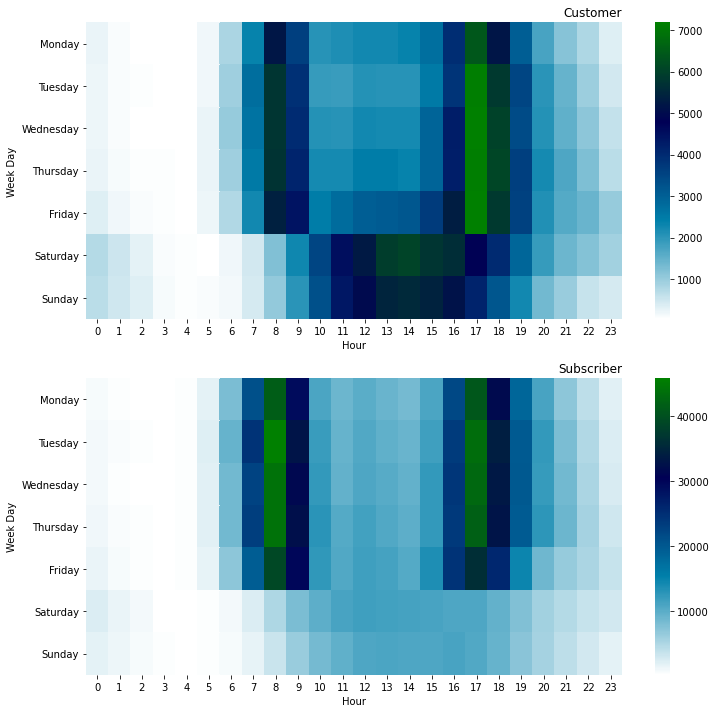

In [22]:
#let's a plot a heatmap indicating how trips is ditriubuted across hours for every user type
plt.suptitle('Hourly Trips per Weekdays for user types')

plt.figure(figsize = [12, 12]);
plt.subplot(2, 1, 1)
customers = df_cln[df_cln['user_type']=='Customer']
cust_counts = customers.groupby(['start_dayofweek', 'start_hourofday']).size()
cust_counts = cust_counts.reset_index(name='count')
cust_counts = cust_counts.pivot(index='start_dayofweek', columns='start_hourofday', values='count')
sb.heatmap(cust_counts, cmap='ocean_r');
plt.title('Customer', loc='right');
plt.xlabel('Hour');
plt.ylabel('Week Day');

plt.subplot(2, 1, 2)
subscribers = df_cln[df_cln['user_type']=='Subscriber']
sub_counts = subscribers.groupby(['start_dayofweek', 'start_hourofday']).size()
sub_counts = sub_counts.reset_index(name='count')
sub_counts = sub_counts.pivot(index='start_dayofweek', columns='start_hourofday', values='count')
sb.heatmap(sub_counts, cmap='ocean_r');
plt.title('Subscriber', loc='right');
plt.xlabel('Hour');
plt.ylabel('Week Day');

In [23]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'fordbike_explore_slide_deck.ipynb'])

0